## Emily Farr

In [19]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import astropy.io.fits as fits

from astropy.wcs import WCS
from astropy.visualization import make_lupton_rgb
from astropy import stats

# Digitized Sky Survey (DSS)

The Digitized Sky Survey is a multiwavelength survey of the sky produced by scanning the photographic Sky Survey plates from the Palomar and UK Schmidt telescopes.

You can download images from the [ESO Online Digitized Sky Survey](http://archive.eso.org/dss/dss)

## Part 1:

- Download a 15 arcmin x 15 acrmin DSS-2-blue FITS image near the [North Galactic Pole](https://en.wikipedia.org/wiki/Galactic_coordinate_system)

- Download a 15 arcmin x 15 acrmin DSS-2-red FITS image near the [Galactic center](https://en.wikipedia.org/wiki/Galactic_coordinate_system).

* Plot the two images with coordinates
* Plot a 5-sigma cut of each of the images
* The images should be nice with labels

In [20]:
galactic_center_file = 'galactic_center_red.fits'

galactic_center_fits = fits.open(galactic_center_file)

galactic_center_fits.info()

Filename: galactic_center_red.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     129   (891, 893)   int16   


In [21]:
north_pole_file = 'north_pole.fits'

north_pole_fits = fits.open(north_pole_file)

north_pole_fits.info()

Filename: north_pole.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU     128   (882, 882)   int16   


In [22]:
galactic_center_data = galactic_center_fits[0].data
galactic_center_header = galactic_center_fits[0].header

In [23]:
north_pole_data = north_pole_fits[0].data
north_pole_header = north_pole_fits[0].header

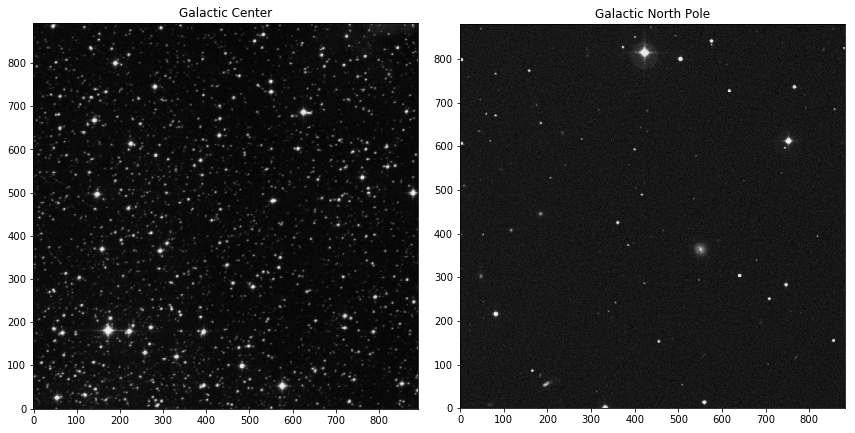

In [86]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].set_title("Galactic Center")
ax[1].set_title("Galactic North Pole")

ax[0].imshow(galactic_center_data, origin='lower', cmap=plt.cm.gray)
ax[1].imshow(north_pole_data, origin='lower', cmap=plt.cm.gray)

In [39]:
my_wcs = WCS(galactic_center_header)
my_wcs_2 = WCS(north_pole_header)

this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
 [astropy.io.fits.verify]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]
this form of the PCi_ja keyword is deprecated, use PCi_ja. [astropy.wcs.wcs]


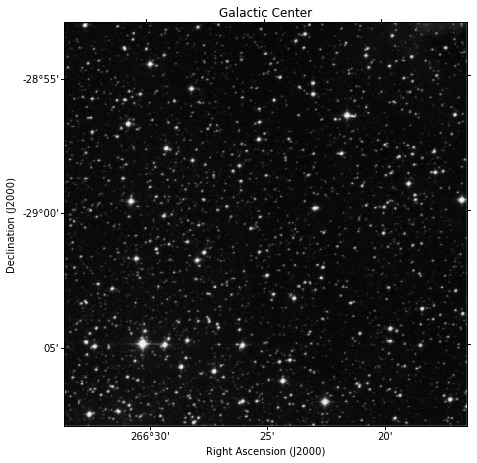

In [81]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=my_wcs)

fig.set_size_inches(6,6)

fig.tight_layout()

ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

ax.set_title("Galactic Center")

ax.imshow(galactic_center_data, origin='lower', cmap=plt.cm.gray);

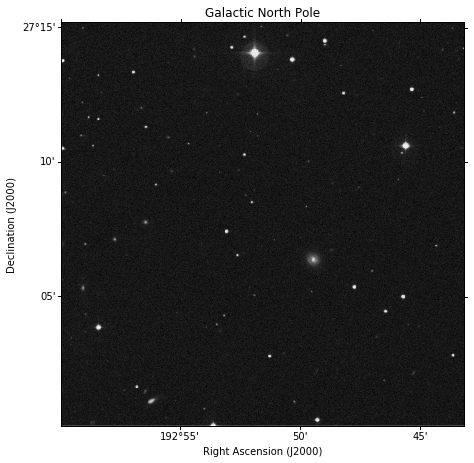

In [82]:
fig = plt.figure()
ax = fig.add_subplot(111, projection=my_wcs_2)

fig.set_size_inches(6,6)

fig.tight_layout()

ax.set_xlabel('Right Ascension (J2000)')
ax.set_ylabel('Declination (J2000)')

ax.set_title("Galactic North Pole")

ax.imshow(north_pole_data, origin='lower', cmap=plt.cm.gray);

In [27]:
clip_galactic = stats.sigma_clip(galactic_center_data, sigma=5, iters=5) 

In [28]:
copy_data_galactic = np.copy(galactic_center_data)
copy_data_galactic[~clip_galactic.mask] = galactic_center_data.min()

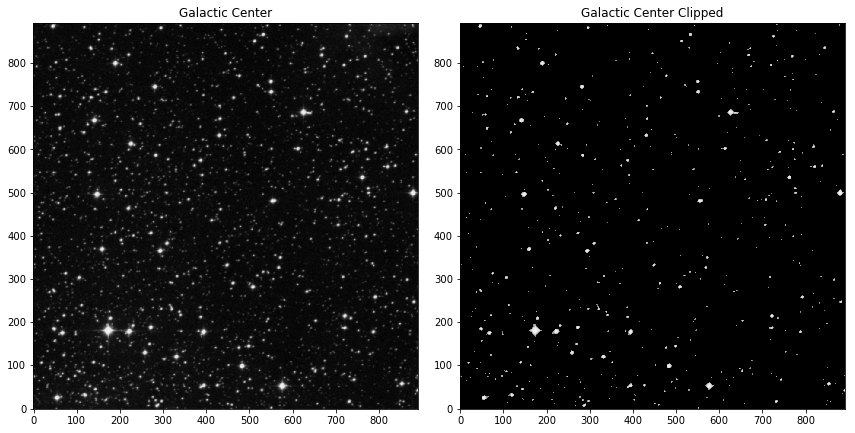

In [73]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].set_title("Galactic Center")
ax[1].set_title("Galactic Center Clipped")

ax[0].imshow(galactic_center_data, origin='lower', cmap=plt.cm.gray)
ax[1].imshow(copy_data_galactic, origin='lower', cmap=plt.cm.gray);

In [30]:
clip_npole = stats.sigma_clip(north_pole_data, sigma=5, iters=5) 

In [31]:
copy_data_npole = np.copy(north_pole_data)
copy_data_npole[~clip_npole.mask] = north_pole_data.min()

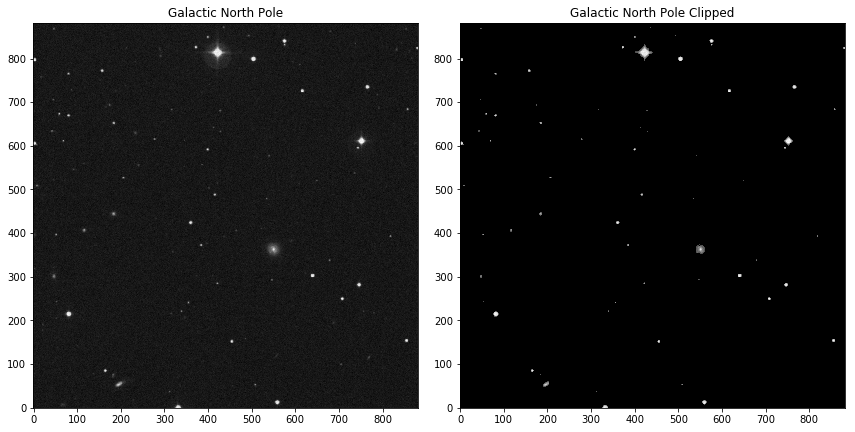

In [74]:
fig, ax = plt.subplots(1,2)

fig.set_size_inches(12,6)

fig.tight_layout()

ax[0].set_title("Galactic North Pole")
ax[1].set_title("Galactic North Pole Clipped")

ax[0].imshow(north_pole_data, origin='lower', cmap=plt.cm.gray)
ax[1].imshow(copy_data_npole, origin='lower', cmap=plt.cm.gray);

## Part 2:

- Pick a cool [Messier object](https://en.wikipedia.org/wiki/List_of_Messier_objects) with Declination  > 0.

* Download a DSS-2-infrared, DSS-2-red, and DSS-2-blue FITS images for the object.

- Create a pseudocolor RGB image from:

  * red = DSS-2-infrared
  * green = DSS-2-infrared
  * blue = DSS-2-blue

- You will have to experimant with the `stretch` to get a good image
* The image should be 10in x 10in, with labels.

In [43]:
red_img = fits.getdata("owl_nebula_infrared.fits").astype(float)[0:294,0:294]
green_img = fits.getdata("owl_nebula_red.fits").astype(float)[0:294,0:294]
blue_img= fits.getdata("owl_nebula_blue.fits").astype(float)

In [44]:
clean_r =  red_img - np.median(red_img)
clean_g =  green_img - np.median(green_img)
clean_b =  blue_img - np.median(blue_img)

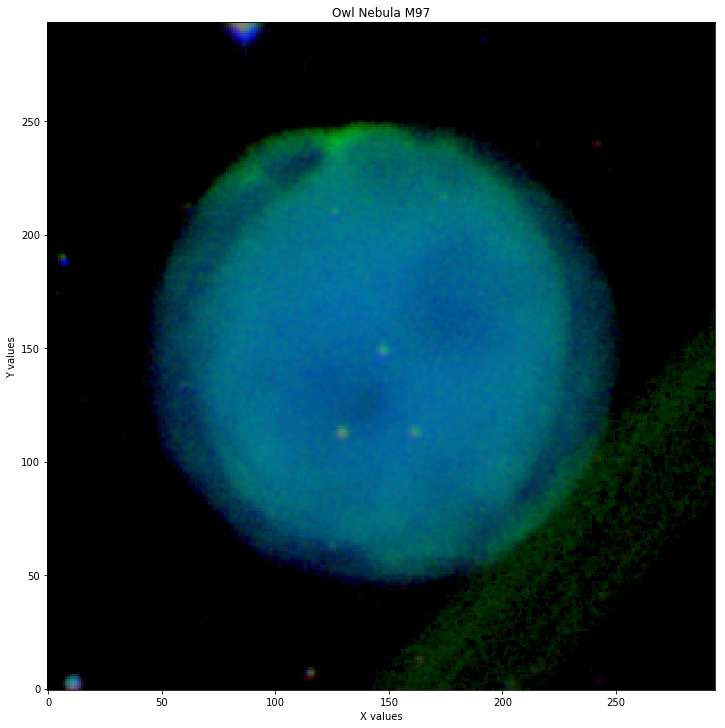

In [84]:
image = make_lupton_rgb(clean_r, clean_g, clean_b, stretch = 8000)
fig, ax = plt.subplots(1,1)
fig.set_size_inches(10,10)

fig.tight_layout()

ax.set_xlabel('X values')
ax.set_ylabel('Y values')

ax.set_title("Owl Nebula M97")

ax.imshow(image, origin='lower', cmap=plt.cm.gray);

## Part 3

For the next Astro 300 class we are going to use an online interface to the LaTeX scientific typesetting system. 
To do this, you will need to sign up for a free account on the ShareLaTeX system before the next class.

* Remember your account name and password, we will use them during class. 

* Please use the following link to sign up for the system: https://www.sharelatex.com?r=f33161ec&rm=d&rs=b 

### Due Tue Nov 21 - 5pm

- `Make sure to change the filename to your name!`
- `Make sure to change the Title to your name!`
- `File -> Download as -> HTML (.html)`
- `upload your .html and .ipynb file to the class Canvas page`  